# 분류 문제의 평가 방법

In [24]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data
# 악성을 1, 양성을 0으로 바꿔주자
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄이자
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)

y_pred = model_lor.predict(x)

C:\python\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 혼동 행렬

In [25]:
from sklearn.metrics import confusion_matrix

# 종속 변수와 예측 결과로 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


## 정확도

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.9121265377855887


## 정밀도

In [27]:
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

0.900990099009901


## 재현율

In [28]:
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8584905660377359


## F1 score

In [29]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.8792270531400966


## 예측 확률

In [30]:
model_lor.predict_proba(X)

array([[7.73103110e-03, 9.92268969e-01],
       [2.04763561e-02, 9.79523644e-01],
       [2.35266319e-03, 9.97647337e-01],
       ...,
       [2.33864630e-02, 9.76613537e-01],
       [8.09237759e-06, 9.99991908e-01],
       [9.99574655e-01, 4.25344878e-04]])

In [33]:
import numpy as np

# 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다.
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)

# 혼동행렬
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


## ROC 곡선

In [34]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)

fpr, tpr, thresholds = roc_curve(y, probas[:,1])

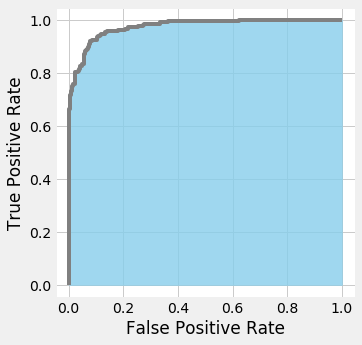

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:,1])

0.9741160615189471

# 회귀 문제의 평가 방법

In [49]:
from sklearn.datasets import load_boston
data = load_boston()

X = data.data[: , [5,]]
y = data.target

# 선형 회귀 모델 사용
from sklearn.linear_model import LinearRegression

model_lir = LinearRegression()
model_lir.fit(X, y)

y_pred = model_lir.predict(X)

print(model_lir.coef_)
print(model_lir.intercept_)

[9.10210898]
-34.670620776438554


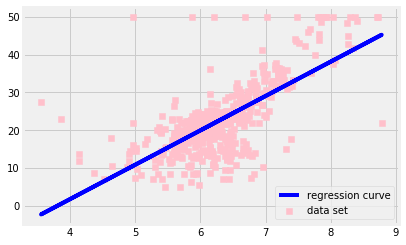

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.legend()
plt.show()

## 평균제곱오차

In [44]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred))

43.60055177116956


## 결정계수 차이

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.48352545599133423


In [50]:
# 위의 데이터를 서포트 벡터 회귀로 모델을 학습시키자
from sklearn.svm import SVR

model_svr_linear = SVR(C=0.01, kernel='linear')
model_svr_linear.fit(X, y)
y_svr_pred = model_svr_linear.predict(X)

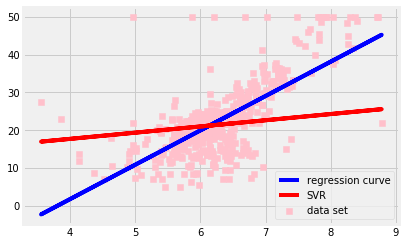

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.plot(X, y_svr_pred, color='red', label='SVR')
ax.legend()
plt.show()

In [53]:
# 평균 제곱오차
print(mean_squared_error(y, y_svr_pred))
# 결정계수
print(r2_score(y, y_svr_pred))
# 기울기
print(model_svr_linear.coef_)
# 절편 출력
print(model_svr_linear.intercept_)


72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]
